In [2]:
import django
import pandas as pd
django.setup()

In [3]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

from sch.models import *
import datetime as dt
from django.db.models import CharField
from django.test import RequestFactory
from sch.actions import *
from sch.views2 import *

In [4]:
shift = Shift.objects.get(name='S')
all_slots = list(Slot.objects.filter(shift=shift).values_list('employee',flat=True))
print(
    f"All {shift} Slots\n",
    all_slots
)

tallies = tally(all_slots)
print (
    "\n======TALLIES======\n",
    sortDict(tallies)
)

All S Slots
 ['Jaden', 'Trisha', 'Tiffany', 'Trisha', 'Esperanza', 'Esperanza', 'Tiffany', None, 'Jaden', None, 'Jaden', 'Jaden', None, 'Jaden', 'Leslie', 'Jaden', None, 'Tiffany', None, 'Trisha', 'Jaden', 'Josh', 'Tiffany', None, 'Jaden', None, 'Tiffany', None, 'Jaden', None, 'Trisha', 'Trisha', 'Tiffany', 'Trisha', 'Jaden', None, 'Tiffany', None, 'Jaden', None, 'Jaden', 'Trisha', 'Tiffany', None, 'Esperanza', 'Esperanza', 'Tiffany', None, 'Jaden', None, 'Tiffany', 'Josh', 'Josh', None, 'Brianna-A', 'Brianna-A', 'Tiffany', None, 'Leslie', None, 'Jaden', 'Jaden', 'Esperanza', 'Jaden', 'Leslie', 'Tiffany', 'Josh', 'Tiffany', 'Jaden', 'Josh', 'Jaden', 'Jaden', 'Tiffany', 'Jaden', 'Leslie', 'Tiffany', 'Josh', 'Tiffany', 'Jaden', 'Josh', 'Jaden', 'Jaden', 'Esperanza', 'Jaden', 'Leslie', 'Tiffany', 'Tiffany', 'Brianna-A', None, 'Josh', 'Jaden', 'Jaden', 'Esperanza', 'Jaden', 'Leslie', 'Josh', 'Josh', 'Tiffany', 'Jaden', 'Josh', 'Jaden', 'Jaden', 'Trisha', 'Jaden', 'Leslie', 'Tiffany', 'Josh

In [6]:
df = pd.DataFrame.from_dict(sortDict(tallies,reverse=True), orient='index', columns=['count'])
df

,count
Jaden,134
Tiffany,52
Josh,38
None,31
Esperanza,22
Leslie,22
Trisha,17
Brianna-A,11
Sabrina,3


<AxesSubplot:>

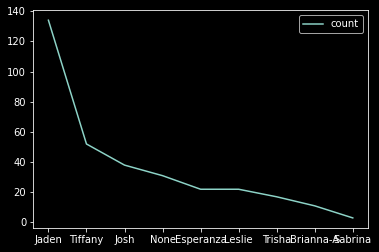

In [9]:
df.plot()

In [10]:
sch = Schedule.objects.first()

empls = Employee.objects.annotate(scheduleHours=Sum('slots__shift__hours')).order_by('-scheduleHours')
# standard schedule Hours should be 240 * the employees fte field
empls = empls.annotate(standardScheduleHours=240*F('fte'))
empls = empls.annotate(percentScheduled=F('scheduleHours')/F('standardScheduleHours')*100)
empls.values('name','scheduleHours','standardScheduleHours','percentScheduled')

<EmployeeManager [{'name': 'Elisia', 'scheduleHours': 2720.0, 'standardScheduleHours': 240.0, 'percentScheduled': 1133.3333333333335}, {'name': 'Jaden', 'scheduleHours': 2640.0, 'standardScheduleHours': 240.0, 'percentScheduled': 1100.0}, {'name': 'Esperanza', 'scheduleHours': 2580.0, 'standardScheduleHours': 240.0, 'percentScheduled': 1075.0}, {'name': 'Mona', 'scheduleHours': 2570.0, 'standardScheduleHours': 240.0, 'percentScheduled': 1070.8333333333335}, {'name': 'Brittanie', 'scheduleHours': 2480.0, 'standardScheduleHours': 240.0, 'percentScheduled': 1033.3333333333335}, {'name': 'Danica', 'scheduleHours': 2440.0, 'standardScheduleHours': 240.0, 'percentScheduled': 1016.6666666666666}, {'name': 'Brianna A', 'scheduleHours': 2430.0, 'standardScheduleHours': 240.0, 'percentScheduled': 1012.5}, {'name': 'David', 'scheduleHours': 2400.0, 'standardScheduleHours': 240.0, 'percentScheduled': 1000.0}, {'name': 'Michael', 'scheduleHours': 2300.0, 'standardScheduleHours': 210.0, 'percentSche